In [1]:
import sys
sys.path.append('/Users/sdbykov/work/self-supervised-halos/')

In [2]:
import requests
import numpy as np
import h5py
import os
import time

%matplotlib inline

from utils.data.tng_query import get, HaloInfo
from utils.utils import data_path
data_path = data_path+'tng/'

In [9]:
halo = HaloInfo(958375)

/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:420: RuntimeWarning: divide by zero encountered in log10
  map_2d = -np.log10(map_2d/np.nanmax(map_2d))
/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:420: RuntimeWarning: invalid value encountered in log10
  map_2d = -np.log10(map_2d/np.nanmax(map_2d))


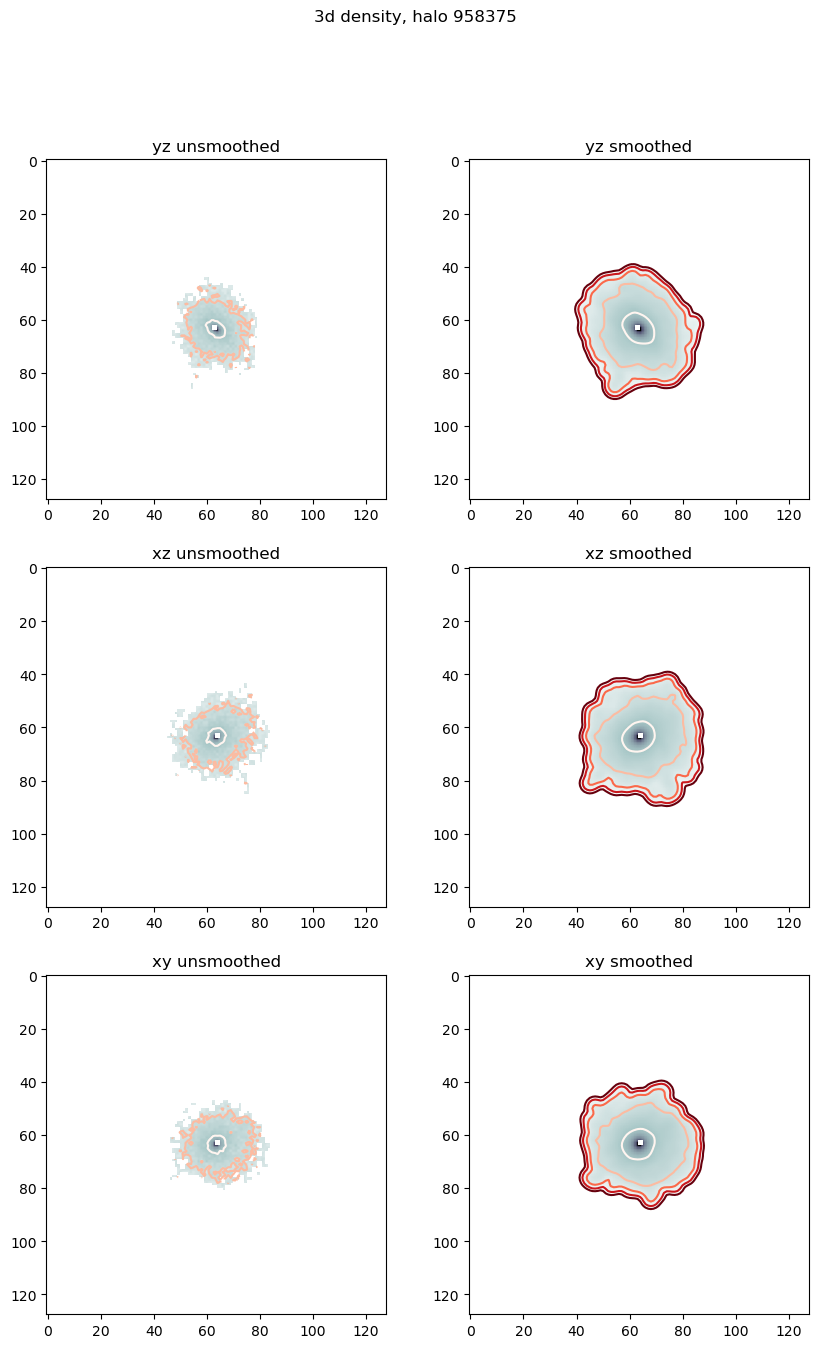

/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:441: RuntimeWarning: divide by zero encountered in log10
  map_2d = -np.log10(map_2d/np.nanmax(map_2d))
/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:441: RuntimeWarning: invalid value encountered in log10
  map_2d = -np.log10(map_2d/np.nanmax(map_2d))


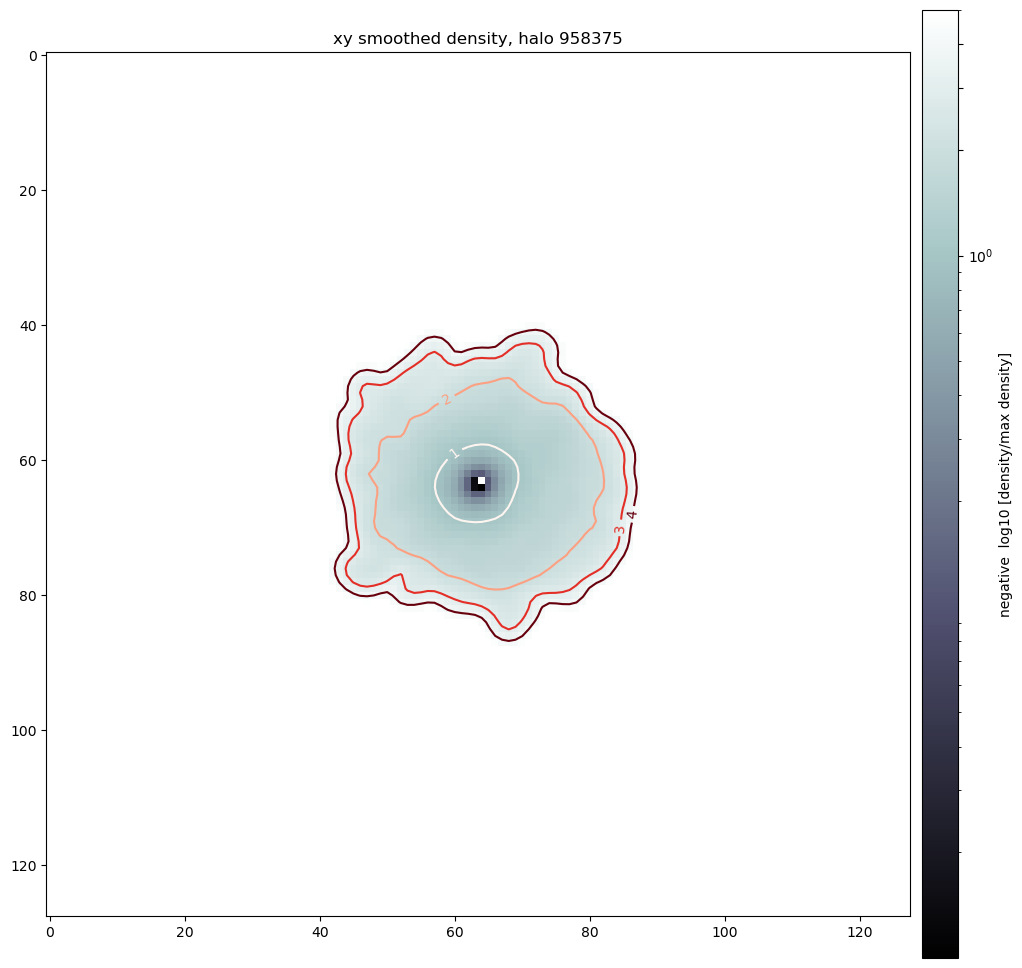

In [15]:
res = halo.make_3d_density()
halo._plot_3d_density(res)

In [8]:
halo.cutout_file

'/Users/sdbykov/work/self-supervised-halos//data//tng/halo_958375_cutout.hdf5'

In [116]:


def download_halo_snapshot(subhalo_url, ):
    halo_id = subhalo_url.split('/')[-2]
    cutout_request = {'dm':'Coordinates,Potential'}
    cutout_name = f'halo_{halo_id}_cutout.hdf5'
    filepath = f'{data_path}/{cutout_name}'

    if os.path.exists(filepath):
        filesize = os.path.getsize(filepath)
        print(f'{cutout_name} already exists, {filesize/1e6:.2f} MB')
        return filepath
    
    t0 = time.time()

    download_url = subhalo_url + 'cutout.hdf5'
    print(f'Downloading {cutout_name} from {download_url}')
    cutout = get(download_url, cutout_request)
    t1 = time.time()
    filesize = os.path.getsize(cutout)
    print(f'Downloaded {cutout_name} in {t1-t0:.2f} s, {filesize/1e6:.2f} MB')
    os.rename(cutout, filepath)
    return filepath


In [117]:
# first convert log solar masses into group catalog units
mass_min = 10**11 / 1e10 * 0.704
mass_max = 10**15 / 1e10 * 0.704

# form the search_query string by hand for once
search_query = "?mass__gt=" + str(mass_min) + "&mass__lt=" + str(mass_max) +'&primary_flag__gt=0.9'+'&len__gr=150'

url = 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/z=0.0/'+"subhalos/" + search_query
subhalos_all = get(url, {'limit':20000})

count = subhalos_all['count']
print(f"{count} halos with search criteria \n \t {search_query}")

subhalos = [subhalos_all['results'][i] for i in uniform_idxs]
subhalos = {sh['id']:sh['url'] for sh in subhalos}


16544 halos with search criteria 
 	 ?mass__gt=7.039999999999999&mass__lt=70400.0&primary_flag__gt=0.9&len__gr=150


In [ ]:
# for id in all_idxs[::-1]:
#     try:
#         subhalo_url = subhalos_all['results'][id]['url']
#         download_halo_snapshot(subhalo_url)
#     except Exception as e:
#         print(f'Error downloading halo {id}: {e}')
#         continue

In [118]:
subhalos


{0: 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/0/',
 693004: 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/693004/',
 770369: 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/770369/',
 814518: 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/814518/',
 845840: 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/845840/',
 870101: 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/870101/',
 890352: 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/890352/',
 908204: 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/908204/',
 923901: 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/923901/',
 938716: 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/938716/',
 958375: 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/958375/'}

In [171]:
get(subhalos[958375])

{'snap': 99,
 'id': 958375,
 'cm_x': 4825.37,
 'cm_y': 24299.0,
 'cm_z': 16737.2,
 'pos_x': 4823.1,
 'pos_y': 24299.3,
 'pos_z': 16737.2,
 'halfmassrad': 24.4816,
 'len': 11755,
 'mass': 7.05263,
 'massinhalfrad': 0.0,
 'massinmaxrad': 1.27733,
 'massinrad': 0.0,
 'spin_x': -19.9112,
 'spin_y': -48.1159,
 'spin_z': 98.8733,
 'vel_x': -605.619,
 'vel_y': -90.9257,
 'vel_z': 197.754,
 'veldisp': 45.4657,
 'vmax': 85.8244,
 'vmaxrad': 7.4635,
 'prog_snap': 98,
 'prog_sfid': 955703,
 'desc_snap': -1,
 'desc_sfid': -1,
 'fp_match_sfid': 692316,
 'parent': 0,
 'grnr': 18280,
 'primary_flag': 1,
 'mass_log_msun': 11.017505907873248,
 'related': {'sublink_progenitor': 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/98/subhalos/955703/',
  'sublink_descendant': None,
  'parent_halo': 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/halos/18280/'},
 'cutouts': {'subhalo': 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/958375/cutout.hdf5',
  'parent_halo': '

In [174]:
snap = download_halo_snapshot(subhalos[814518])
sublink = download_sublink(subhalos[814518])

halo_814518_cutout.hdf5 already exists, 1.44 MB
Error downloading sublink http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/814518/, 503 Server Error: Service Unavailable for url: https://data-eu.tng-project.org/tree/sublink/L75n1820TNG_DM/99/814518/hdf5/?token=46b45fc66696eae1acae
retrying...
Error downloading sublink http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/814518/, 503 Server Error: Service Unavailable for url: https://data-eu.tng-project.org/tree/sublink/L75n1820TNG_DM/99/814518/hdf5/?token=a3d2274785e76c9ba6a7
stopping


In [123]:
res = make_3d_density(908204)

halo_908204_cutout.hdf5 already exists, 0.52 MB


/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:142: RuntimeWarning: divide by zero encountered in log10
  map_2d = -np.log10(map_2d/np.nanmax(map_2d))
/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:142: RuntimeWarning: invalid value encountered in log10
  map_2d = -np.log10(map_2d/np.nanmax(map_2d))


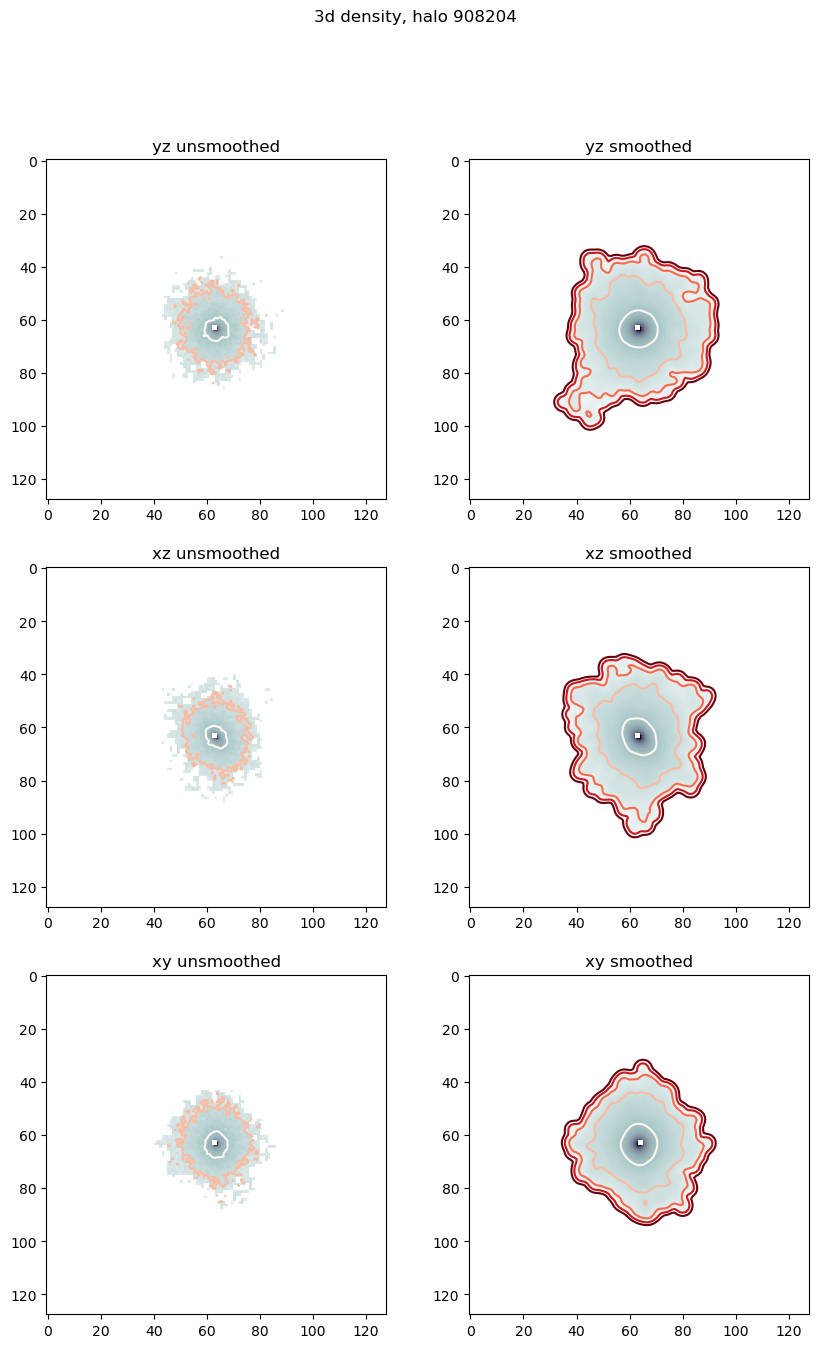

/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:163: RuntimeWarning: divide by zero encountered in log10
  map_2d = -np.log10(map_2d/np.nanmax(map_2d))
/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:163: RuntimeWarning: invalid value encountered in log10
  map_2d = -np.log10(map_2d/np.nanmax(map_2d))


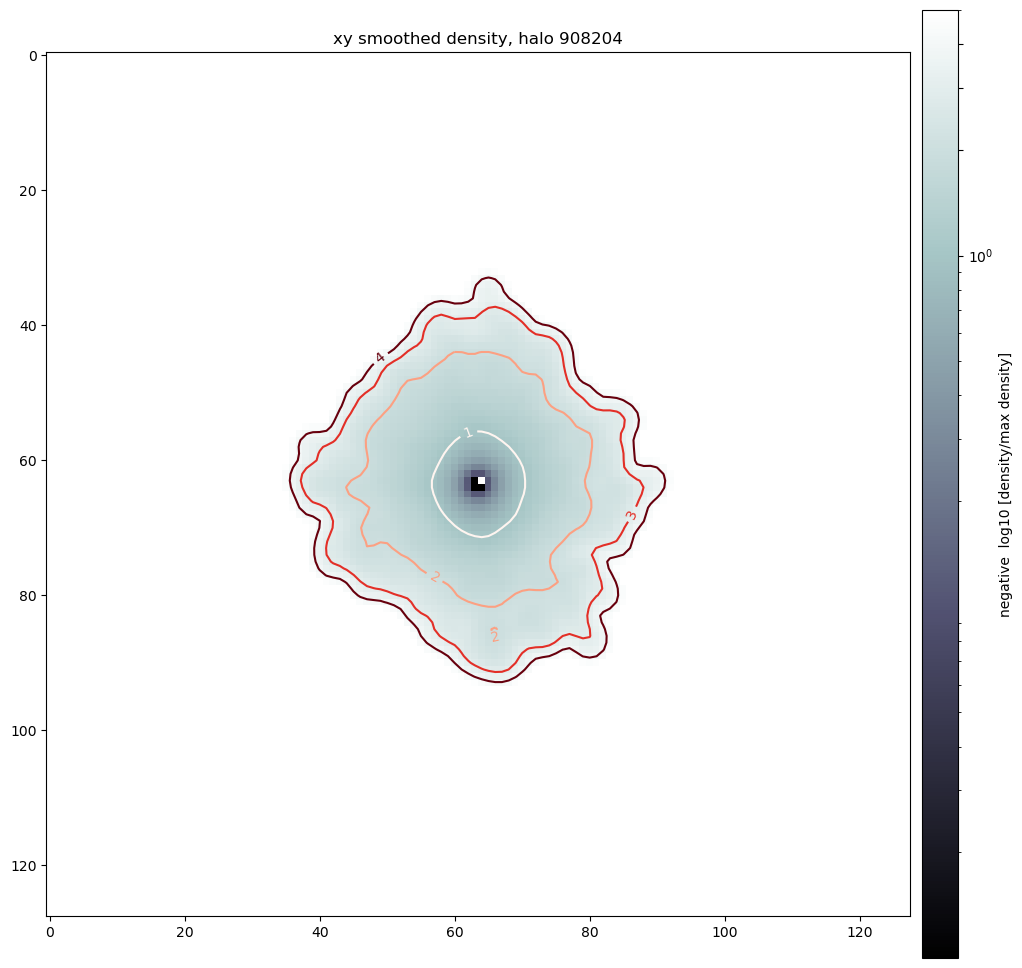

In [124]:
plot_3d_density(res)

In [125]:
#open 

f = h5py.File('/Users/sdbykov/work/self-supervised-halos/data/tng/halo_958375_sublink.hdf5', 'r')

In [ ]:
#find mass of this subhalo as a function of snapshot number



In [127]:
f.keys()

<KeysViewHDF5 ['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'GroupCM', 'GroupFirstSub', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupVel', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloCM', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloID', 'SubhaloIDMostbound', 'SubhaloIDRaw', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSpin', 'SubhaloVel', 'SubhaloVelDisp', 'SubhaloVmax', 'SubhaloVmaxRad', 'TreeID']>

In [153]:
sn = f['SnapNum']
len = f['NumParticles'][:]
mass = f['SubhaloMass'][:]
id = f['SubhaloID'][:]

In [163]:
f

<HDF5 file "halo_958375_sublink.hdf5" (mode r)>

In [162]:
mass

array([7.0526342 , 7.032235  , 7.0088363 , 6.961439  , 6.905642  ,
       6.9128413 , 6.8630443 , 6.868444  , 6.829446  , 6.7610493 ,
       6.732851  , 6.7022524 , 6.6158566 , 6.572659  , 6.514462  ,
       6.497063  , 6.4694643 , 6.4280667 , 6.3290715 , 6.305673  ,
       6.299673  , 6.3098726 , 6.2354765 , 6.243876  , 6.1556807 ,
       6.1628804 , 6.194079  , 6.149081  , 6.2162776 , 6.250476  ,
       6.252276  , 6.112483  , 6.308073  , 6.266075  , 6.2888737 ,
       6.210878  , 6.1250825 , 6.0458865 , 5.9846897 , 5.9090934 ,
       6.0062885 , 5.709304  , 5.454317  , 5.316924  , 5.244928  ,
       5.2881255 , 5.1501327 , 4.9497433 , 4.896346  , 4.551964  ,
       4.3875723 , 4.2765784 , 4.310776  , 4.3659735 , 4.281378  ,
       4.23818   , 4.207582  , 4.088188  , 3.9285963 , 3.7726042 ,
       3.7744043 , 3.5602152 , 3.4732199 , 3.3796246 , 3.164836  ,
       3.0574415 , 2.9026494 , 2.8462524 , 2.7124593 , 2.6878605 ,
       2.5774662 , 2.5720665 , 2.5432682 , 2.4994705 , 2.55166

In [169]:
id

array([40002071900000000, 40002071900000001, 40002071900000002,
       40002071900000003, 40002071900000004, 40002071900000005,
       40002071900000006, 40002071900000007, 40002071900000008,
       40002071900000009, 40002071900000010, 40002071900000011,
       40002071900000012, 40002071900000013, 40002071900000014,
       40002071900000015, 40002071900000016, 40002071900000017,
       40002071900000018, 40002071900000019, 40002071900000020,
       40002071900000021, 40002071900000022, 40002071900000023,
       40002071900000024, 40002071900000025, 40002071900000026,
       40002071900000027, 40002071900000028, 40002071900000029,
       40002071900000030, 40002071900000031, 40002071900000032,
       40002071900000033, 40002071900000034, 40002071900000035,
       40002071900000036, 40002071900000037, 40002071900000038,
       40002071900000039, 40002071900000040, 40002071900000041,
       40002071900000042, 40002071900000043, 40002071900000044,
       40002071900000045, 40002071900000

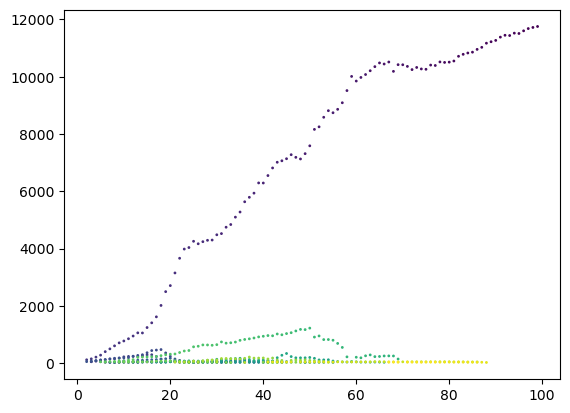

In [168]:
plt.scatter(sn, len, c=id, s=1)

In [152]:
id

array([40002071900000000, 40002071900000001, 40002071900000002,
       40002071900000003, 40002071900000004, 40002071900000005,
       40002071900000006, 40002071900000007, 40002071900000008,
       40002071900000009, 40002071900000010, 40002071900000011,
       40002071900000012, 40002071900000013, 40002071900000014,
       40002071900000015, 40002071900000016, 40002071900000017,
       40002071900000018, 40002071900000019, 40002071900000020,
       40002071900000021, 40002071900000022, 40002071900000023,
       40002071900000024, 40002071900000025, 40002071900000026,
       40002071900000027, 40002071900000028, 40002071900000029,
       40002071900000030, 40002071900000031, 40002071900000032,
       40002071900000033, 40002071900000034, 40002071900000035,
       40002071900000036, 40002071900000037, 40002071900000038,
       40002071900000039, 40002071900000040, 40002071900000041,
       40002071900000042, 40002071900000043, 40002071900000044,
       40002071900000045, 40002071900000

In [151]:
import illustris_python as il

fields = ['SubhaloMass','SubfindID','SnapNum']
start = 100
for i in range(start,start+5):
    #tree = il.sublink.loadTree(basePath,135,GroupFirstSub[i],fields=fields,onlyMPB=True)
    tree = il.sublink.loadTree('data/tng/halo_958375_sublink.hdf5',135,131727,fields=fields,onlyMPB=True)
    plt.plot(tree['SnapNum'],tree['SubhaloMass'],'-')
plt.yscale('log')
plt.xlabel('Snapshot Number')
plt.ylabel('Total Subhalo Mass [code units]')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'data/tng/halo_958375_sublink.hdf5/../postprocessing/offsets/offsets_135.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)